In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Activation,Dropout,Flatten,Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [73]:
 (x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [48]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [49]:
print('X_train Count:'+ str(x_train.shape[0]))
print('X_test Count:'+ str(x_test.shape[0]))

X_train Count:60000
X_test Count:10000


In [50]:
#divide the train 70-30 between train and validation
X_train,X_val,Y_train,Y_val=train_test_split(x_train,y_train,random_state=0,test_size=0.3)

In [51]:
print('X_train Count:'+ str(X_train.shape[0]))
print('Train Label Count:'+str(Y_train.shape[0]))
print('-------------------------------------------------------')
print('X_Val Count:'+ str(X_val.shape[0]))
print('Validation Label Count:'+str(Y_val.shape[0]))
print('-------------------------------------------------------')
print('X_test Count:'+ str(x_test.shape[0]))
print('Test Label Count:'+str(y_test.shape[0]))

X_train Count:42000
Train Label Count:42000
-------------------------------------------------------
X_Val Count:18000
Validation Label Count:18000
-------------------------------------------------------
X_test Count:10000
Test Label Count:10000


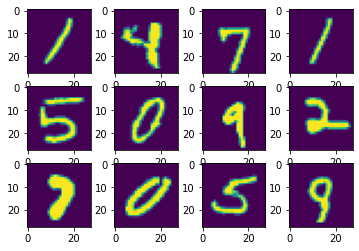

In [52]:
#visualize the images using matplotlib
f, axarr = plt.subplots(3,4)
for i in range(0,3):
  for j in range(0,4):
    #import random number between 0 and 42000
    r=random.randrange(0,42001,1)
    axarr[i,j].imshow(X_train[r])

In [53]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))

In [54]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
# normalize to range 0-1
X_train=X_train/255.0
X_val=X_val/255.0

In [55]:
#create a model with 3 Layers
model=Sequential([
      Conv2D(16,(3,3),padding='same',input_shape=(28,28,1)),
      Activation('relu'),
      Conv2D(32,(3,3),padding='same'),
      Activation('relu'),
      Conv2D(64,(3,3),padding='same'),
      Activation('relu'),
      MaxPooling2D((2,2)),
      Flatten(),
      Dense(100, activation='relu'),
      Dense(10,activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0

In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(lr=1e-3,momentum=0.9),metrics=['accuracy'])

In [20]:
history=model.fit(
        X_train,Y_train,
        epochs=15,
        validation_data=(X_val,Y_val),
        verbose=1)

Epoch 1/15
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3641 - accuracy: 0.8954 - val_loss: 0.2012 - val_accuracy: 0.9393
Epoch 2/15
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1796 - accuracy: 0.9462 - val_loss: 0.1602 - val_accuracy: 0.9499
Epoch 3/15
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1223 - accuracy: 0.9625 - val_loss: 0.1042 - val_accuracy: 0.9679
Epoch 4/15
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0877 - accuracy: 0.9731 - val_loss: 0.0783 - val_accuracy: 0.9760
Epoch 5/15
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0662 - accuracy: 0.9796 - val_loss: 0.0771 - val_accuracy: 0.9774
Epoch 6/15
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9851 - val_loss: 0.0731 - val_accuracy: 0.9765
Epoch 7/15
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0689 - val_accuracy:

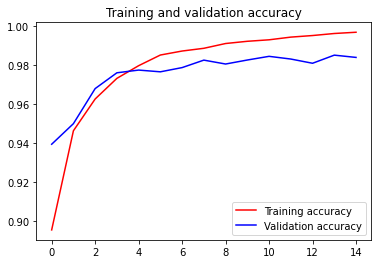

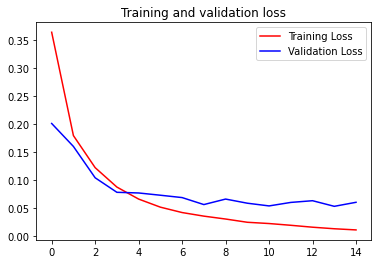

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [42]:
model_1=Sequential([
      #layer 1
      Conv2D(32,(4,4),padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)),
      BatchNormalization(),
      Conv2D(32,(4,4),padding='same',activation='relu',kernel_initializer='he_uniform'),
      BatchNormalization(),
      Conv2D(32,(4,4),padding='same',activation='relu',kernel_initializer='he_uniform'),
      BatchNormalization(),
      Dropout(0.4),
      MaxPooling2D((2,2)),

      #layer 2
      Conv2D(64,(4,4),padding='same',activation='relu',kernel_initializer='he_uniform'),
      BatchNormalization(),
      Conv2D(64,(4,4),padding='same',activation='relu',kernel_initializer='he_uniform'),
      BatchNormalization(),
      Dropout(0.4),
      MaxPooling2D((2,2)),

      Flatten(),
      #Fully Connected Layers
      Dense(100,activation='relu',kernel_initializer='he_uniform'),
      #prediction layer
      Dense(10,activation='softmax')
])

model_1.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(lr=1e-3,momentum=0.5),metrics=['accuracy'])

history=model_1.fit(
        X_train,Y_train,
        epochs=30,
        validation_data=(X_val,Y_val),
        verbose=1)

Epoch 1/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3235 - accuracy: 0.8996 - val_loss: 0.1566 - val_accuracy: 0.9575
Epoch 2/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1136 - accuracy: 0.9642 - val_loss: 0.1148 - val_accuracy: 0.9681
Epoch 3/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0823 - accuracy: 0.9733 - val_loss: 0.0878 - val_accuracy: 0.9769
Epoch 4/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0669 - accuracy: 0.9795 - val_loss: 0.0794 - val_accuracy: 0.9787
Epoch 5/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0567 - accuracy: 0.9820 - val_loss: 0.0707 - val_accuracy: 0.9807
Epoch 6/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0532 - accuracy: 0.9832 - val_loss: 0.0655 - val_accuracy: 0.9828
Epoch 7/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0465 - accuracy: 0.9864 - val_loss: 0.0602 - val_accuracy:

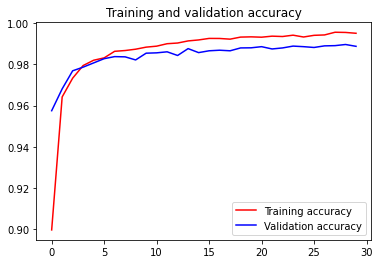

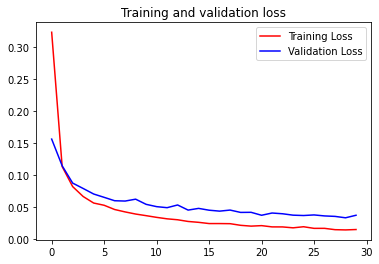

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [74]:
#reshape test data
X_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
#convert to float
X_test = X_test.astype('float32')
# normalize to range 0-1
X_test=X_test/255.0

In [86]:
loss, acc = model_1.evaluate(X_test, y_test, verbose=0)
print('Loss of the Model is {} and Accuracy of the Model is {}'.format(round(loss,4),round(acc,4)))

Loss of the Model is 0.0279 and Accuracy of the Model is 0.9911
